# Importing & Merging many files (Baby Names Dataset) 

## Getting the Files from the Web

__Go__ to  https://catalog.data.gov/dataset/baby-names-from-social-security-card-applications-national-data and __download__ and __unzip__ the file.

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing one File & Understanding the Data Structure

__Load__ the file __"yob1880.txt"__ into Pandas and __inspect__.

In [73]:
pd.read_csv('yob1880.txt', sep=",", header=None, names=['Name', 'Gender', 'Count'])

,Name,Gender,Count
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


## Importing & merging many files

__Load__ all files (yob????.txt) and __merge/concatenate__ all files into one Pandas DataFrame. Make sure you add the __column "Year"__.

In [74]:
dataframes = []
for year in range(1880, 2019): # RANGE!
    data = pd.read_csv('yob{}.txt'.format(year), header=None, names=['Name', 'Gender', 'Count'])
    data['Year'] = year
    dataframes.append(data)


In [75]:
# pd.concat(dataframes,  axis = 0, keys = years, names = ["Year"]) # this produces an outer indext
df = pd.concat(dataframes, axis=0).reset_index(drop=True)

In [76]:
df = df[['Year', 'Name', 'Gender', 'Count']]

# Explanatory Data Analysis & Advanced Visualization (Baby Names Dataset)

In [77]:
df#.info()

,Year,Name,Gender,Count
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746
...,...,...,...,...
1957041,2018,Zylas,M,5
1957042,2018,Zyran,M,5
1957043,2018,Zyrie,M,5
1957044,2018,Zyron,M,5


In [78]:
df.nunique()

Year        139
Name      98400
Gender        2
Count     13720
dtype: int64

## First Inspection: The most popular Names in 2018

Find the most popular __Baby Girl Names__ in __2018__. 

In [79]:
df[(df.Gender=='F') & (df.Year==2018)].groupby('Name').sum('Count').sort_values(by='Count', ascending=False).head(5)

,Year,Count
Name,,
Emma,2018,18688
Olivia,2018,17921
Ava,2018,14924
Isabella,2018,14464
Sophia,2018,13928


Find the most popular __Baby Boy Names__ in __2018__.

In [80]:
df[(df.Gender=='M') & (df.Year==2018)].groupby('Name').sum('Count').sort_values(by='Count', ascending=False).head(5)

,Year,Count
Name,,
Liam,2018,19837
Noah,2018,18267
William,2018,14516
James,2018,13525
Oliver,2018,13389


__Create__ the function __most_pop(year, gender, n)__ that returns the __n__ most popular __M/F__ Names in the __year XYZ__.

In [81]:
def most_pop(year, gender, n):
    return df[(df.Gender==gender) & (df.Year==year)].groupby('Name').sum('Count').sort_values(by='Count', ascending=False).head(n)


## Evergreen Names (1880 - 2018)

Evergreen names are popular 100 years ago and are still popular today.

Find those __Evergreen Boy Names__ that are in __1880 and 2018__ among the most popular Boy Names (__Top 20__).

In [82]:
m_1880 = most_pop(1880, 'M', 20)
m_2018 = most_pop(2018, 'M', 20)

m_2018[['Count']].merge(m_1880[['Count']], how='inner', on='Name', suffixes=('_2018', '_1880')).reset_index()

,Name,Count_2018,Count_1880
0,William,14516,9532
1,James,13525,5927
2,Henry,10649,2444


Find those __Evergreen Girl Names__ that are in __1880 and 2018__ among the most popular Girl Names (__Top 20__).

In [83]:
f_1880 = most_pop(1880, 'F', 20)
f_2018 = most_pop(2018, 'F', 20)

f_2018[['Count']].merge(f_1880[['Count']], how='inner', on='Name', suffixes=('_2018', '_1880')).reset_index()

,Name,Count_2018,Count_1880
0,Emma,18688,2003
1,Elizabeth,8513,1939
2,Ella,8055,1156


## Advanced Data Aggregation

In [84]:
agg = df.groupby(['Name', 'Gender']).agg(Total=('Count', 'sum'), No_Year=('Year', 'count'), 
                                         First_Year=('Year', 'min'), Last_Year=('Year', 'max'), 
                                         Max_Count=('Count', 'max'))

In [85]:
agg.reset_index(inplace=True)

In [86]:
agg

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count
0,Aaban,M,114,11,2007,2018,16
1,Aabha,F,35,5,2011,2016,9
2,Aabid,M,16,3,2003,2018,6
3,Aabidah,F,5,1,2018,2018,5
4,Aabir,M,10,2,2016,2018,5
...,...,...,...,...,...,...,...
109168,Zyvion,M,5,1,2009,2009,5
109169,Zyvon,M,7,1,2015,2015,7
109170,Zyyanna,F,6,1,2010,2010,6
109171,Zyyon,M,6,1,2014,2014,6


__How to interpret agg (and the first observation Aaban, M):__<br>
- There are in total 114 Male Babies with the name Aaban (Total)<br>
- The combination/entry (Aaban, M) can be found in 11 different years (No_Year)<br>
- The combination/entry (Aaban, M) appeared in the year 2007 for the first time (First_Year)<br>
- The last appearance was in the year 2018 (Last_Year)<br>
- In the most popular year, (Aaban, M) appeared 16 times (Max_Count)
- The most popular year for (Aaban, M) (Best_Year)

## Most Popular Names of all Times

__Find__ the __10 most popular__ Male and Female Names of all Times (most popular in terms of total count).

In [87]:
all_times = agg.groupby('Gender').apply(lambda x: x.nlargest(10, 'Total'))
all_times

Name Gender    Total  No_Year  First_Year  Last_Year  \
Gender                                                                     
F      68679        Mary      F  4125675      139        1880       2018   
       30706   Elizabeth      F  1638349      139        1880       2018   
       79184    Patricia      F  1572016      135        1884       2018   
       46567    Jennifer      F  1467207      101        1916       2018   
       62973       Linda      F  1452668      139        1880       2018   
       11699     Barbara      F  1434397      139        1880       2018   
       67371    Margaret      F  1248985      139        1880       2018   
       94540       Susan      F  1121703      139        1880       2018   
       28575     Dorothy      F  1107635      139        1880       2018   
       87546       Sarah      F  1077746      139        1880       2018   
M      43582       James      M  5164280      139        1880       2018   
       48388        John      M  5124817      139        1880       2018   
       84427      Robert      M  4820129      139        1880       2018   
       71023     Michael      M  4362731      139        1880       2018   
       104615    William      M  4117369      139        1880       2018   
       24204       David      M  3621322      139        1880       2018   
       49192      Joseph      M  2613304      139        1880       2018   
       83864     Richard      M  2565301      139        1880       2018   
       18299     Charles      M  2392779      139        1880       2018   
       98544      Thomas      M  2311849      139        1880       2018   

               Max_Count  
Gender                    
F      68679       73985  
       30706       20744  
       79184       56442  
       46567       63603  
       62973       99689  
       11699       48792  
       67371       28467  
       94540       47402  
       28575       39999  
       87546       28484  
M      43582       94757  
       48388       88319  
       84427       91640  
       71023       92704  
       104615      66989  
       24204       86253  
       49192       32732  
       83864       58868  
       18299       40770  
       98544       48652

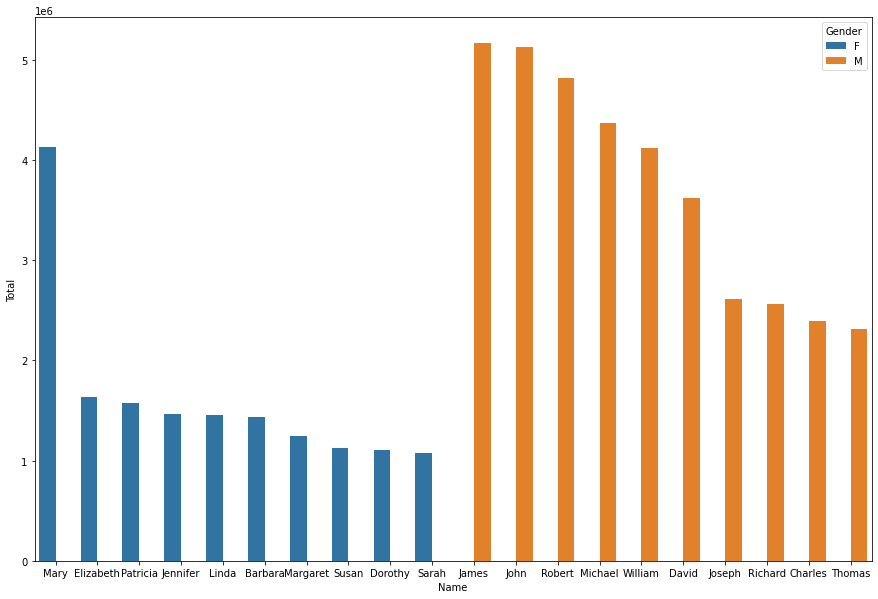

In [88]:
plt.figure(figsize = (15, 10))
sns.barplot(x = "Name", y = "Total", data = all_times.reset_index(drop=True), hue = "Gender")
plt.show()

## General Trends over time (1880 - 2018)

__Count__ the total number of __registered Babies per Year__ and visualize.

In [89]:
babies_per_year = df.groupby('Year').Count.sum()

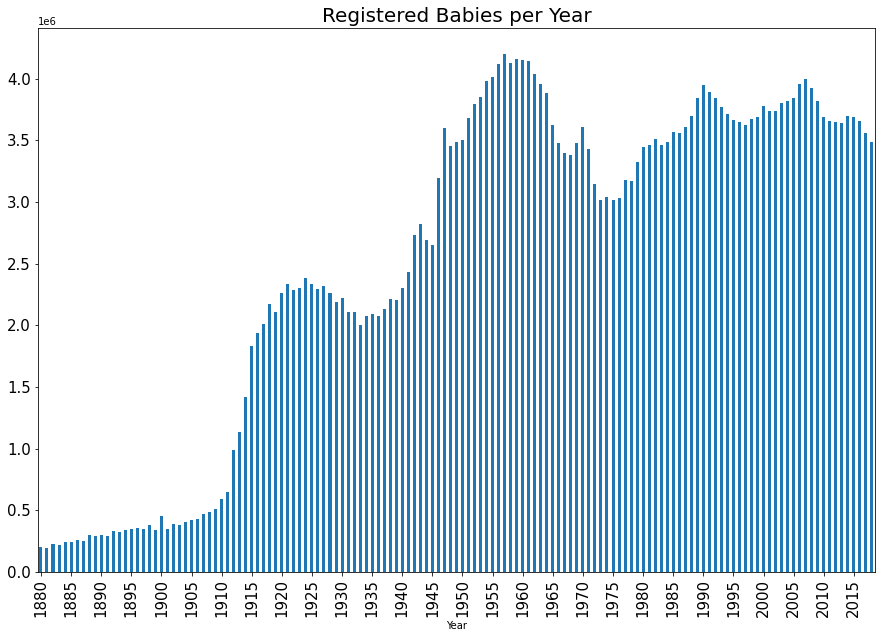

In [90]:
pd.options.display.float_format = '{:.0f}'.format
babies_per_year.plot(kind = "bar", y= "Count", figsize = (15, 10), fontsize = 15)
plt.xticks(ticks = (range(0, len(babies_per_year), 5)), labels =  range(1880, 2019, 5))
plt.title("Registered Babies per Year", fontsize = 20)
plt.show()

__Count__ the total number of __Unique Names per Year__ and visualize.

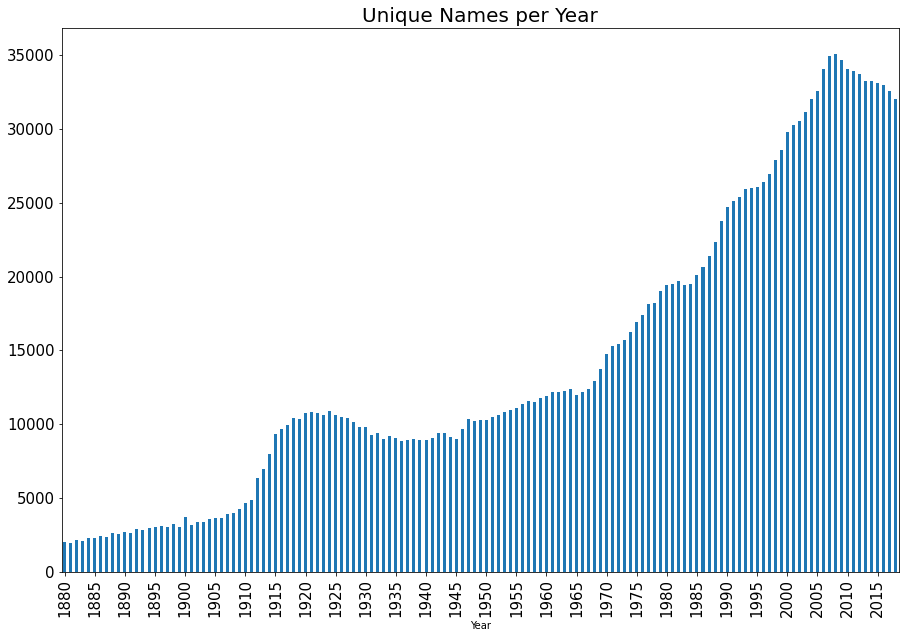

In [91]:
diff_names = df.groupby('Year').Name.count()

diff_names.plot(kind = "bar", y= "Count", figsize = (15, 10), fontsize = 15)
plt.xticks(ticks = (range(0, len(diff_names), 5)), labels =  range(1880, 2019, 5))
plt.title("Unique Names per Year", fontsize = 20)
plt.show()

## Creating the Features "Popularity" and "Rank"

- Popularity in __babies per million__ (example: assume 2,000,000 registered Girl Names in 1950, thereof 100,000 Maries -> Popularity Score in 1950 for (Mary, F) is 100,000 / 2,000,000 * 1,000,000 = 50,000 per million.)  

In [92]:
df.groupby(['Year', 'Gender']).Count.transform('sum')

0            90994
1            90994
2            90994
3            90994
4            90994
            ...   
1957041    1800392
1957042    1800392
1957043    1800392
1957044    1800392
1957045    1800392
Name: Count, Length: 1957046, dtype: int64

In [93]:
df['Popularity'] = df.Count.div(df.groupby(['Year', 'Gender']).Count.transform('sum'))*1000000

- Rank (example: assume Mary is the most popular Girl Name in 1950 -> Rank 1 for (Mary, F) in 1950.

In [94]:
df['Rank'] = df.groupby(['Year', 'Gender']).Count.apply(lambda x: x.rank(ascending = False))

In [95]:
df

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642,1
1,1880,Anna,F,2604,28617,2
2,1880,Emma,F,2003,22012,3
3,1880,Elizabeth,F,1939,21309,4
4,1880,Minnie,F,1746,19188,5
...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042
1957042,2018,Zyran,M,5,3,13042
1957043,2018,Zyrie,M,5,3,13042
1957044,2018,Zyron,M,5,3,13042


## Visualizing Name Trends over Time

 __Visualize__ Popularity and Rank over time

In [96]:
df[(df.Name=='Mary') & (df.Gender=='F')]

,Year,Name,Gender,Count,Popularity,Rank
0,1880,Mary,F,7065,77642,1
2000,1881,Mary,F,6919,75245,1
3935,1882,Mary,F,8148,75551,1
6062,1883,Mary,F,8012,71333,1
8146,1884,Mary,F,9217,71439,1
...,...,...,...,...,...,...
1793168,2014,Mary,F,2632,1477,120
1826414,2015,Mary,F,2631,1478,123
1859539,2016,Mary,F,2508,1420,127
1892548,2017,Mary,F,2402,1397,126


In [97]:
def plot_name(name, gender, crit = 'Popularity'):
    data = df.loc[(df.Name==name) & (df.Gender==gender), ['Name', 'Gender', 'Year', 'Rank', crit]]
    
    
    fig, ax1 = plt.subplots(figsize = (12, 8))
    ax1.bar(x = data.Year, height= data[crit], label = crit)
    ax2 = ax1.twinx()
    ax2.plot(data.Year, data.Rank, color = "red", label = "Rank")
    ax1.set_xlabel("Year", fontsize = 15)
    ax1.set_ylabel("Babies per million", fontsize = 15)
    ax2.set_ylabel("Rank", fontsize = 15)
    ax1.set_title(name, fontsize = 18)
    ax1.tick_params(labelsize = 12)
    ax2.tick_params(labelsize = 12)
    ax1.legend(loc = 2, fontsize = 15)
    ax2.legend(loc = 1, fontsize = 15)
    plt.show()

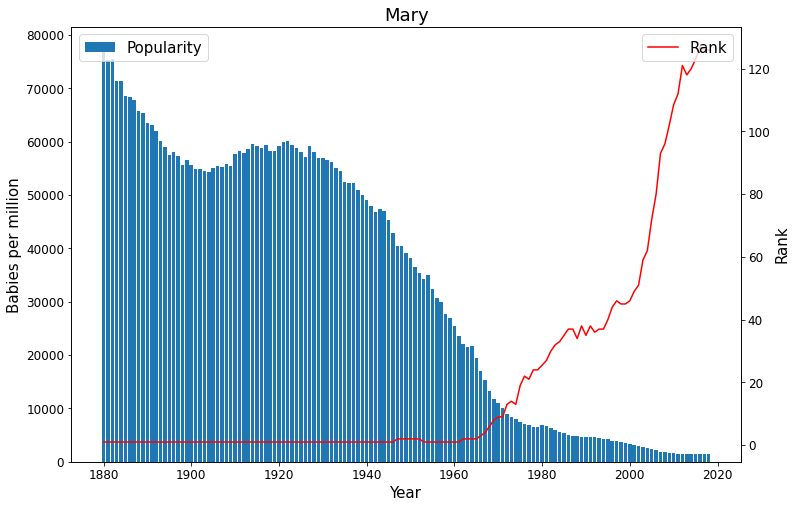

In [98]:
plot_name('Mary', 'F')

# Why does a Name´s Popularity suddenly change?

__Add__ the additional columns __"Pop_lag1"__ (Popularity one year ago) and __"Pop_diff"__ (change in popularity from previous year to this year) to df.  

In [99]:
df.loc[(df.Name == "Mary") & (df.Gender == "F"), "Popularity"].shift()

0           NaN
2000      77642
3935      75245
6062      75551
8146      71333
           ... 
1793168    1514
1826414    1477
1859539    1478
1892548    1420
1925138    1397
Name: Popularity, Length: 139, dtype: float64

In [100]:
df['Pop_lag1'] = df.groupby(['Name', 'Gender']).Popularity.shift()

In [101]:
df.loc[(df.Year>1880) & (df.Pop_lag1.isna()), 'Pop_lag1'] = 0

In [102]:
df['Pop_diff'] = df.Popularity - df.Pop_lag1

In [103]:
df

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff
0,1880,Mary,F,7065,77642,1,NaN,NaN
1,1880,Anna,F,2604,28617,2,NaN,NaN
2,1880,Emma,F,2003,22012,3,NaN,NaN
3,1880,Elizabeth,F,1939,21309,4,NaN,NaN
4,1880,Minnie,F,1746,19188,5,NaN,NaN
...,...,...,...,...,...,...,...,...
1957041,2018,Zylas,M,5,3,13042,4,-1
1957042,2018,Zyran,M,5,3,13042,3,-0
1957043,2018,Zyrie,M,5,3,13042,3,0
1957044,2018,Zyron,M,5,3,13042,8,-5


__Create__ df2 starting with the __year 1900__ (from 1900 till today).

In [104]:
df2 = df[df.Year>=1900].copy()

__Filter__ df2 and find the __20 largest values__ in "Pop_diff" (get complete rows).

In [105]:
df2.reindex(df2.Pop_diff.abs().nlargest(20).index)

,Year,Name,Gender,Count,Popularity,Rank,Pop_lag1,Pop_diff
431066,1947,Linda,F,99689,56236,1,33547,22689
321479,1935,Shirley,F,42358,40398,2,21874,18524
922468,1983,Ashley,F,33293,19930,4,8775,11156
339412,1937,Shirley,F,26816,25204,4,33798,-8593
711426,1971,Jennifer,F,56783,34134,1,26403,7730
726721,1972,Jennifer,F,63603,41813,1,34134,7680
312301,1934,Shirley,F,22840,21874,4,14203,7671
645417,1966,Michelle,F,27151,16047,4,9186,6861
751941,1973,Jason,M,46683,29940,3,23081,6859
330516,1936,Shirley,F,35161,33798,2,40398,-6601


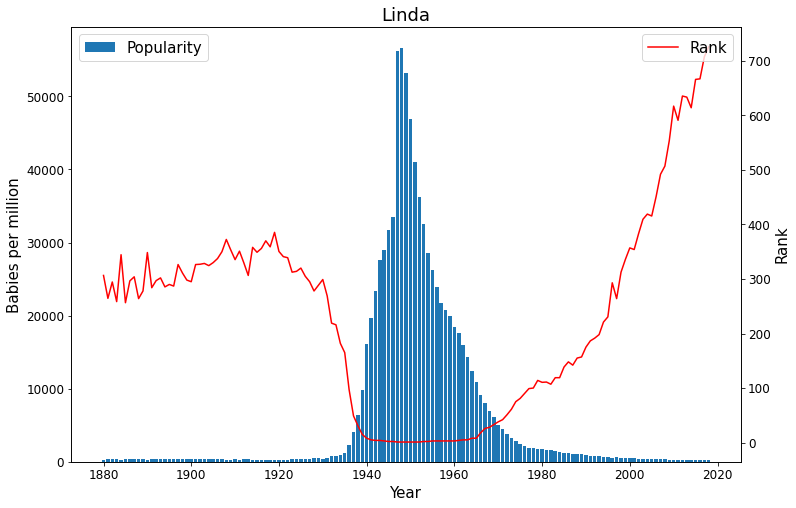

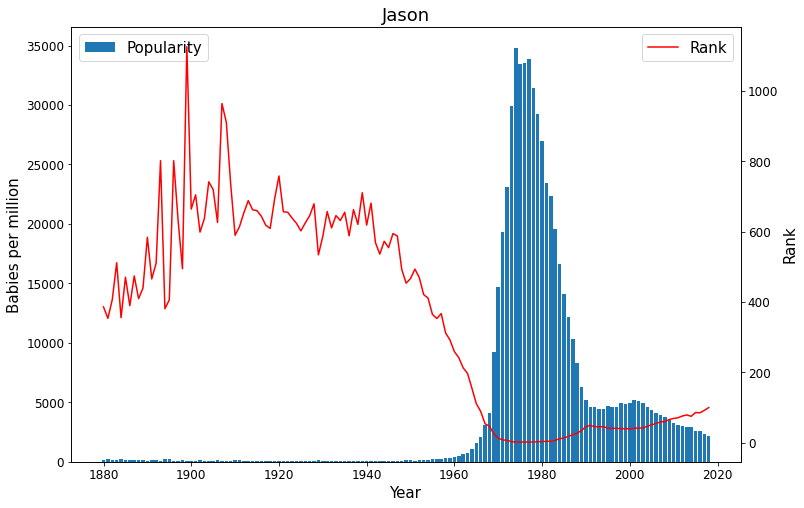

In [106]:
plot_name("Linda", "F")
plot_name("Jason", "M")

## Persistant vs. Spike-Fade Names

In [107]:
agg["Spike_Score"] = agg.Max_Count.div(agg.Total).mul(100)

In [108]:
agg.sort_values(by='Spike_Score', ascending=True).head(20) # lower the spike score means more persistent

,Name,Gender,Total,No_Year,First_Year,Last_Year,Max_Count,Spike_Score
49192,Joseph,M,2613304,139,1880,2018,32732,1
30706,Elizabeth,F,1638349,139,1880,2018,20744,1
85133,Rosa,F,174125,139,1880,2018,2230,1
69242,Maurice,M,134504,139,1880,2018,1743,1
25419,Delia,F,36276,139,1880,2018,491,1
21172,Cornelius,M,35764,139,1880,2018,485,1
28009,Domingo,M,13797,121,1882,2018,190,1
68440,Marshall,M,91352,139,1880,2018,1270,1
97753,Teodoro,M,3079,111,1884,2018,43,1
103320,Victor,M,317673,139,1880,2018,4444,1


In [109]:
spike = agg[(agg.Total>1000) & (agg.No_Year>10)].sort_values(by='Spike_Score', ascending=True).head(20)

l = list(zip(spike.Name, spike.Gender)) # ready to send to plot_name function
l

[('Joseph', 'M'),
 ('Elizabeth', 'F'),
 ('Rosa', 'F'),
 ('Maurice', 'M'),
 ('Delia', 'F'),
 ('Cornelius', 'M'),
 ('Domingo', 'M'),
 ('Marshall', 'M'),
 ('Teodoro', 'M'),
 ('Victor', 'M'),
 ('Nelson', 'M'),
 ('Sina', 'F'),
 ('Lovell', 'M'),
 ('Katheryn', 'F'),
 ('Zenobia', 'F'),
 ('Theron', 'M'),
 ('Alida', 'F'),
 ('Alfonso', 'M'),
 ('Manuel', 'M'),
 ('Jessie', 'M')]

## Most Popular Unisex Names

In [110]:
df[df.Name=='Mary'].groupby(['Name', 'Gender']).Count.sum()

Name  Gender
Mary  F         4125675
      M           15165
Name: Count, dtype: int64

As seen above, both female and male babies are named 'Mary', however the margin is quite big. We are looking for names that are more equally common in both sexes.

In [111]:
unisex = df.groupby(['Name', 'Gender']).Count.sum().unstack()
unisex.dropna(inplace = True)
unisex

Gender,F,M
Name,,
Aaden,5,4828
Aadi,16,851
Aadyn,16,516
Aalijah,149,212
Aaliyah,87442,96
...,...,...
Zyion,168,918
Zyon,620,2638
Zyonn,5,40


We found names that appear in both sexes. Now it is time to find the ones that are common in both.

In [112]:
unisex = unisex[unisex.min(axis=1)>10000]

unisex_names = abs(unisex.F.div(unisex.M).sub(1)).sort_values().index
unisex.loc[unisex_names].head(20)

Gender,F,M
Name,,
Elisha,13762,13595
Quinn,31670,32071
Kerry,48549,49646
Blair,14922,14527
Kris,13504,14055
Robbie,22290,20926
Justice,16354,17580
Riley,106901,94278
Emerson,20904,24472
